Nama : Naura Jasmine Azzahra
NRP : 5026211005

# Regular Expression Analysis of HaloDoc Reviews

This notebook demonstrates the use of regular expressions to analyze and clean text data from HaloDoc reviews.

## Import Libraries

In [2]:
import re
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

## Load and Prepare Data

In [6]:
#Baca file CSV
df = pd.read_csv("C:/Users/User/Jupyter Notebook/PBA/df_halodoc_after_detectlang.csv")

## Define Regular Expression

In [7]:
#  Definisikan pola regex
patterns = {
    'obat': r'\bobat\b',
    'dokter': r'\bdokter\b',
    'konsultasi': r'\bkonsultasi\b',
    'aplikasi': r'\baplikasi\b',
    'halodoc': r'\bhalodoc\b',
    'resep': r'\bresep\b',
    'apotek': r'\bapotek\b',
    'sakit': r'\bsakit\b',
    'membantu': r'\bmembantu\b',
    'praktis': r'\bpraktis\b'
}

## Apply Regular Expressions

In [8]:
# Fungsi untuk menghitung kemunculan pola dalam teks
def count_patterns(text):
    return {key: len(re.findall(pattern, text, re.IGNORECASE)) for key, pattern in patterns.items()}

# Terapkan fungsi ke kolom 'content'
df['pattern_counts'] = df['content'].apply(count_patterns)

# Hitung total kemunculan setiap pola
total_counts = df['pattern_counts'].apply(pd.Series).sum()

## Analyze and Visualize Results

In [25]:
# Urutkan hasil
sorted_counts = sorted(total_counts.items(), key=lambda x: x[1], reverse=True)

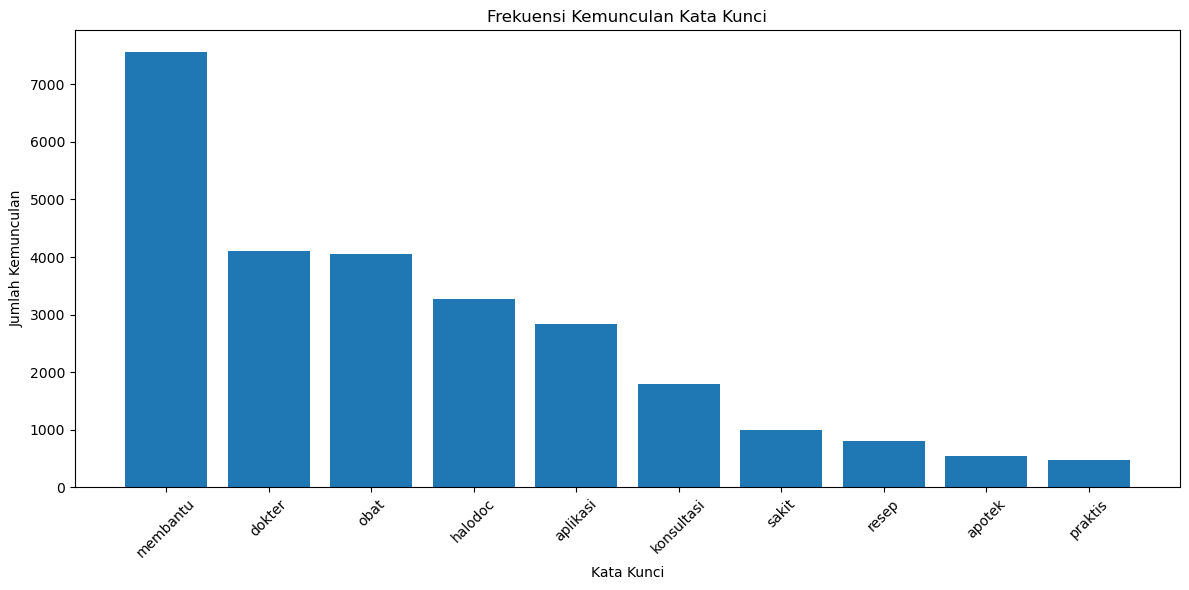

In [26]:
# Visualisasi hasil
plt.figure(figsize=(12, 6))
plt.bar([x[0] for x in sorted_counts], [x[1] for x in sorted_counts])
plt.title('Frekuensi Kemunculan Kata Kunci')
plt.xlabel('Kata Kunci')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Tampilkan hasil
print("Frekuensi kemunculan kata kunci:")
for key, value in sorted_counts:
    print(f"{key}: {value}")

Frekuensi kemunculan kata kunci:
membantu: 7563
dokter: 4098
obat: 4060
halodoc: 3270
aplikasi: 2836
konsultasi: 1793
sakit: 996
resep: 801
apotek: 542
praktis: 476


## More Analyzing

In [29]:
# Contoh analisis lebih lanjut: Korelasi antara kata kunci
correlation_matrix = df['pattern_counts'].apply(pd.Series).corr()
print("\nMatriks korelasi antar kata kunci:")
print(correlation_matrix)


Matriks korelasi antar kata kunci:
                obat    dokter  konsultasi  aplikasi   halodoc     resep  \
obat        1.000000  0.163261    0.117051  0.148303  0.210207  0.245800   
dokter      0.163261  1.000000    0.340759  0.132732  0.114099  0.232282   
konsultasi  0.117051  0.340759    1.000000  0.097605  0.089429  0.132546   
aplikasi    0.148303  0.132732    0.097605  1.000000  0.118063  0.063174   
halodoc     0.210207  0.114099    0.089429  0.118063  1.000000  0.088153   
resep       0.245800  0.232282    0.132546  0.063174  0.088153  1.000000   
apotek      0.214542  0.033289    0.003886  0.086491  0.076242  0.087222   
sakit       0.128937  0.112867    0.076319  0.072438  0.109958  0.040590   
membantu    0.051586  0.070151    0.073796  0.111894  0.056100  0.016939   
praktis     0.013478  0.017450    0.023866  0.004352 -0.000956  0.007159   

              apotek     sakit  membantu   praktis  
obat        0.214542  0.128937  0.051586  0.013478  
dokter      0.033289 

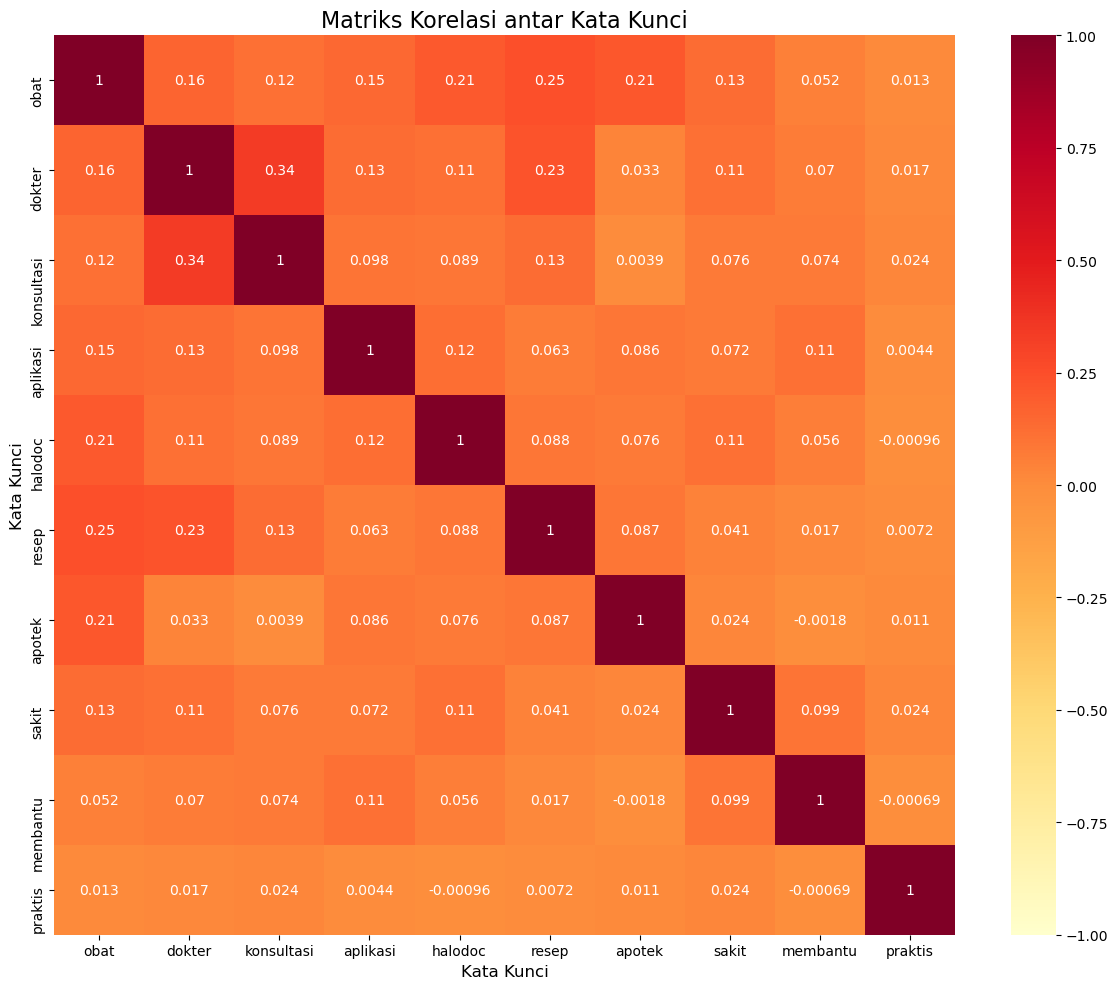


Matriks korelasi antar kata kunci:
                obat    dokter  konsultasi  aplikasi   halodoc     resep  \
obat        1.000000  0.163261    0.117051  0.148303  0.210207  0.245800   
dokter      0.163261  1.000000    0.340759  0.132732  0.114099  0.232282   
konsultasi  0.117051  0.340759    1.000000  0.097605  0.089429  0.132546   
aplikasi    0.148303  0.132732    0.097605  1.000000  0.118063  0.063174   
halodoc     0.210207  0.114099    0.089429  0.118063  1.000000  0.088153   
resep       0.245800  0.232282    0.132546  0.063174  0.088153  1.000000   
apotek      0.214542  0.033289    0.003886  0.086491  0.076242  0.087222   
sakit       0.128937  0.112867    0.076319  0.072438  0.109958  0.040590   
membantu    0.051586  0.070151    0.073796  0.111894  0.056100  0.016939   
praktis     0.013478  0.017450    0.023866  0.004352 -0.000956  0.007159   

              apotek     sakit  membantu   praktis  
obat        0.214542  0.128937  0.051586  0.013478  
dokter      0.033289 

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung matriks korelasi
correlation_matrix = df['pattern_counts'].apply(pd.Series).corr()

# Buat plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1, center=0)

# Atur judul dan label
plt.title('Matriks Korelasi antar Kata Kunci', fontsize=16)
plt.xlabel('Kata Kunci', fontsize=12)
plt.ylabel('Kata Kunci', fontsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()

# Cetak matriks korelasi (opsional)
print("\nMatriks korelasi antar kata kunci:")
print(correlation_matrix)

## More Regular Expression

In [31]:
# Contoh pencarian kalimat yang mengandung kombinasi kata kunci tertentu
def find_sentences_with_keywords(text, keywords):
    sentences = re.split(r'[.!?]+', text)
    return [sentence.strip() for sentence in sentences if all(keyword in sentence.lower() for keyword in keywords)]

keywords_to_search = ['obat', 'dokter']
df['sentences_with_keywords'] = df['content'].apply(lambda x: find_sentences_with_keywords(x, keywords_to_search))

print("\nContoh kalimat yang mengandung kata 'obat' dan 'dokter':")
for sentences in df['sentences_with_keywords']:
    for sentence in sentences:
        print(f"- {sentence}")


Contoh kalimat yang mengandung kata 'obat' dan 'dokter':
- sangat membantu dalam konsultasi dokter dan pembelian obat
- sangat membantu, interaktif dengan dokternya dan pemesanan obat sangat mudah, terima kasih
- duit sudah dipotong biaya dokter dan obat
- dokternya sangat informatif dan merekomendasikan dokter terbaik disekitar jadi bisa lebih mudah untuk berkonsultasi dan meresepkan obat
- good, gak semahal dokter offline dan masih bisa memilih untuk beli obatnya dan bisa antar juga resepnya, surat dokter pun dipermudah karena sudah merupakan surat yg sah
- kebanyakan dokter terlalu cepat mendiagnosa akhirnya pemberian obat kurang tepat
- dokter profesional, obat cepat datang
- contoh: di daftar toko kesehatan, obat masih ada, tapi setelah minta resep untuk obat tersebut malah kata dokter tidak tersedia
- dokter2nya memberikan obat yang sesuai
- maaf kali ini saya beri review bintang satu, sebenarnya chat dengan dokter sudah sangat membantu, apalagi bisa konsultasi 24 jam, sayangnya

In [32]:
# Contoh analisis lebih lanjut: Temukan review yang mengandung kata 'obat' dan 'membantu'
obat_membantu = df[df['content'].str.contains(r'\bobat\b.*\bmembantu\b|\bmembantu\b.*\bobat\b', case=False, regex=True)]
print("\nContoh review yang mengandung 'obat' dan 'membantu':")
print(obat_membantu['content'].head())



Contoh review yang mengandung 'obat' dan 'membantu':
9        sangat membantu dalam konsultasi dokter dan pe...
15       sangat membantu, interaktif dengan dokternya d...
210      maaf kali ini saya beri review bintang satu, s...
234      update review, july 2024 : saat ini sudah bany...
348      sangat membantu saat memerlukan obat dengan ce...
                               ...                        
35698    pertama kali download and order langsung sukse...
35730    sangat membantu untuk konsultasi doker. untuk ...
35803    sangat membantu..lagi urgent dan ga sempet ke ...
35828    ini pertama x saya order obat secara online,aw...
35896    puas banget, sangat membantu sekali dikala kon...
Name: content, Length: 911, dtype: object


In [39]:
# Analisis sentimen sederhana
df['sentiment'] = df['content'].apply(lambda x: 'Negative' if 'membantu' in x.lower() else 'Positive')
sentiment_counts = df['sentiment'].value_counts()
print("\nAnalisis Sentimen Sederhana:")
print(sentiment_counts)



Analisis Sentimen Sederhana:
sentiment
Positive    28436
Negative     7495
Name: count, dtype: int64


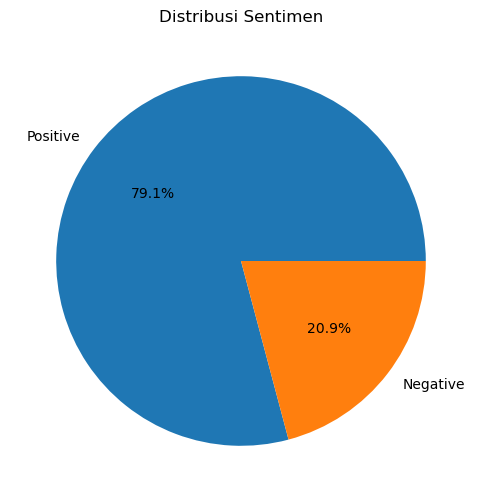

In [22]:
# Visualisasi sentimen
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribusi Sentimen')
plt.ylabel('')
plt.show()

## Analisis Kalimat dengan Kata Kunci Menggunakan Regular Expression

In [35]:
# Fungsi untuk mencari kalimat dengan kata kunci tertentu
def find_sentences_with_keywords(text, keywords):
    sentences = re.split(r'[.!?]+', text)
    return [sentence.strip() for sentence in sentences if all(keyword in sentence.lower() for keyword in keywords)]

# Kata kunci yang dicari
keywords_to_search = ['obat', 'dokter']

# Terapkan fungsi ke kolom 'content'
df['sentences_with_keywords'] = df['content'].apply(lambda x: find_sentences_with_keywords(x, keywords_to_search))

# Tampilkan hasil
print("\nContoh kalimat yang mengandung kata 'obat' dan 'dokter':")
for sentences in df['sentences_with_keywords']:
    for sentence in sentences:
        print(f"- {sentence}")

# Contoh penggunaan regex untuk mencari pola tertentu
pattern = r'\b(?:obat|dokter)\b.*\b(?:obat|dokter)\b'
matches = df['content'].str.extractall(f'({pattern})')

print("\nContoh kalimat dengan pola yang lebih spesifik:")
for match in matches[0].unique():
    print(f"- {match}")
    
# Kode ini mendefinisikan fungsi find_sentences_with_keywords yang mencari kalimat dalam teks yang mengandung kata kunci 
#tertentu. Fungsi ini menggunakan regular expression untuk memisahkan kalimat dan kemudian memeriksa apakah semua kata kunci 
#ada dalam kalimat tersebut. Kode ini kemudian menerapkan fungsi tersebut pada kolom 'content' dari DataFrame untuk mencari 
#kalimat yang mengandung kata 'obat' dan 'dokter'. Selain itu, kode ini juga mencari pola yang lebih spesifik 
#menggunakan regex \b(?:obat|dokter)\b.*\b(?:obat|dokter)\b untuk menemukan kalimat yang mengandung kedua kata tersebut 
#dalam urutan apapun.


Contoh kalimat yang mengandung kata 'obat' dan 'dokter':
- sangat membantu dalam konsultasi dokter dan pembelian obat
- sangat membantu, interaktif dengan dokternya dan pemesanan obat sangat mudah, terima kasih
- duit sudah dipotong biaya dokter dan obat
- dokternya sangat informatif dan merekomendasikan dokter terbaik disekitar jadi bisa lebih mudah untuk berkonsultasi dan meresepkan obat
- good, gak semahal dokter offline dan masih bisa memilih untuk beli obatnya dan bisa antar juga resepnya, surat dokter pun dipermudah karena sudah merupakan surat yg sah
- kebanyakan dokter terlalu cepat mendiagnosa akhirnya pemberian obat kurang tepat
- dokter profesional, obat cepat datang
- contoh: di daftar toko kesehatan, obat masih ada, tapi setelah minta resep untuk obat tersebut malah kata dokter tidak tersedia
- dokter2nya memberikan obat yang sesuai
- maaf kali ini saya beri review bintang satu, sebenarnya chat dengan dokter sudah sangat membantu, apalagi bisa konsultasi 24 jam, sayangnya

## Ekstraksi Fitur Layanan HaloDoc Menggunakan Regular Expression

In [37]:
text = '''Pengalaman yang memanjakan penggunanya, 
    ketika selesai chat/konsultasi dengan dokter lalu dibuatkan resep obatnya 
    sekaligus sistem akan cek ketersediaan lalu muncul harga dan langsung bisa dibayarkan. 
    Dokter memberikan penjelasan yang detail tentang obat yang diresepkan. 
    Sangat praktis karena bisa langsung memesan obat yang direkomendasikan dokter tanpa harus pergi ke apotek.'''

def get_pattern_match(pattern, text):
    matches = re.findall(pattern, text)
    if matches:
        return matches[0]
    return None

def extract_halodoc_features(text):
    consultation = get_pattern_match('selesai (chat/konsultasi) dengan dokter', text)
    prescription = get_pattern_match('dibuatkan (resep obatnya)', text)
    availability_check = get_pattern_match('sistem akan (cek ketersediaan)', text)
    price_display = get_pattern_match('muncul (harga)', text)
    payment = get_pattern_match('langsung bisa (dibayarkan)', text)
    explanation = get_pattern_match('Dokter memberikan (penjelasan yang detail)', text)
    order_process = get_pattern_match('bisa langsung (memesan obat)', text)
    
    return {
        'consultation_type': consultation,
        'prescription_process': prescription,
        'availability_check': availability_check,
        'price_display': price_display,
        'payment_process': payment,
        'doctor_explanation': explanation,
        'order_process': order_process
    }

print(extract_halodoc_features(text))

# Fitur-fitur yang diekstrak meliputi 
# a. jenis konsultasi, 
# b. proses resep, 
# c. pengecekan ketersediaan obat, 
# d. tampilan harga, 
# e. proses pembayaran, 
# f. penjelasan dokter, 
# g. dan proses pemesanan. 
#Fungsi ini menggunakan pola regex yang spesifik untuk setiap fitur dan mengembalikan hasil dalam bentuk dictionary.

{'consultation_type': 'chat/konsultasi', 'prescription_process': 'resep obatnya', 'availability_check': 'cek ketersediaan', 'price_display': 'harga', 'payment_process': 'dibayarkan', 'doctor_explanation': 'penjelasan yang detail', 'order_process': 'memesan obat'}


# Pencarian Kalimat dengan Kata Kunci 'Konsultasi' dan 'Dokter'

In [42]:
# Contoh pencarian kalimat yang mengandung kombinasi kata kunci tertentu
def find_sentences_with_keywords(text, keywords):
    sentences = re.split(r'[.!?]+', text)
    return [sentence.strip() for sentence in sentences if all(keyword in sentence.lower() for keyword in keywords)]

keywords_to_search = ['konsultasi', 'dokter']
df['sentences_with_keywords'] = df['content'].apply(lambda x: find_sentences_with_keywords(x, keywords_to_search))

print("\nContoh kalimat yang mengandung kata 'konsultasi' dan 'dokter':")
for sentences in df['sentences_with_keywords']:
    for sentence in sentences:
        print(f"- {sentence}")


Contoh kalimat yang mengandung kata 'konsultasi' dan 'dokter':
- sangat membantu dalam konsultasi dokter dan pembelian obat
- karena blm puas konsultasi maupun dokternya blm semoat jawab semua pertanyaan kita tapi waktu sesi sdh habis
- dokternya sangat informatif dan merekomendasikan dokter terbaik disekitar jadi bisa lebih mudah untuk berkonsultasi dan meresepkan obat
- cara terbaik utk konsultasi dokter dalam keadaan darurat ataupun tidak bisa keluar rumah
- dokternya ga kompeten, udah konsultasi jawabnya pake jawaban google 🙄 ga recommend banget deh
- memudahkan sekali untuk berkonsultasi dengan dokter
- untuk konsultasi psikolog masih ada beberapa dokter yang tidak paham dengan permasalahan klien
- maaf kali ini saya beri review bintang satu, sebenarnya chat dengan dokter sudah sangat membantu, apalagi bisa konsultasi 24 jam, sayangnya pengiriman obat sangat mengecewakan, obat saya dijadwalkan sampai di tgl 21 tapi sampai tgl 26 status pengiriman masih stuck tidak bergerak di eks

# Ekstraksi Fitur Ulasan HaloDoc Menggunakan Regular Expression

In [21]:
text = '''maaf kali ini saya beri review bintang satu, 
sebenarnya chat dengan dokter sudah sangat membantu, apalagi bisa konsultasi 24 jam, 
sayangnya pengiriman obat sangat mengecewakan, obat saya dijadwalkan sampai di tgl 21 tapi sampai tgl 26 
status pengiriman masih stuck tidak bergerak di ekspedisi, padahal itu obat yang pastinya sangat dibutuhkan 
orang yang sesang sakit, tolong lebih cermat memilih partner ekspedisi karena sangat perugikan pengguna, terimakasih'''

def get_pattern_match(pattern, text):
    matches = re.findall(pattern, text)
    if matches:
        return matches[0]
    return None

def extract_review_features(text):
    rating = get_pattern_match('review bintang (satu|dua|tiga|empat|lima)', text)
    chat_experience = get_pattern_match('chat dengan dokter (.*?) apalagi', text)
    consultation_availability = get_pattern_match('bisa konsultasi (.*?) jam', text)
    delivery_experience = get_pattern_match('pengiriman obat (.*?),', text)
    delivery_schedule = get_pattern_match('dijadwalkan sampai di tgl (\d+)', text)
    actual_delivery = get_pattern_match('sampai tgl (\d+)', text)
    delivery_status = get_pattern_match('status pengiriman (.*?) di ekspedisi', text)
    medicine_importance = get_pattern_match('obat yang pastinya (.*?) orang yang sesang sakit', text)
    suggestion = get_pattern_match('tolong (.*?) ekspedisi', text)
    impact = get_pattern_match('karena (.*?) pengguna', text)
    
    return {
        'rating': rating,
        'chat_experience': chat_experience,
        'consultation_availability': consultation_availability,
        'delivery_experience': delivery_experience,
        'delivery_schedule': delivery_schedule,
        'actual_delivery': actual_delivery,
        'delivery_status': delivery_status,
        'medicine_importance': medicine_importance,
        'suggestion': suggestion,
        'impact': impact
    }

print(extract_review_features(text))

#Kode ini mendefinisikan fungsi extract_review_features yang menggunakan regular expression 
#untuk mengekstrak berbagai fitur dari sebuah ulasan tentang layanan HaloDoc. 
#Fitur-fitur yang diekstrak meliputi 
# a. rating, 
# b. pengalaman chat, 
# c. ketersediaan konsultasi, 
# d. pengalaman pengiriman, 
# e. jadwal pengiriman, 
# f. status pengiriman, 
# g. pentingnya obat, 
# h. saran, dan 
# i. dampak. 
# Fungsi ini menggunakan pola regex yang spesifik untuk setiap fitur dan mengembalikan hasil dalam bentuk dictionary.

{'rating': 'satu', 'chat_experience': 'sudah sangat membantu,', 'consultation_availability': '24', 'delivery_experience': 'sangat mengecewakan', 'delivery_schedule': '21', 'actual_delivery': '26', 'delivery_status': 'masih stuck tidak bergerak', 'medicine_importance': None, 'suggestion': 'lebih cermat memilih partner', 'impact': 'sangat perugikan'}


## Regular Expression for Extracting Consultation Time

In [34]:
import re
import pandas as pd

# Assuming df_text is your DataFrame
# If not, replace df_text with the correct variable name

# Function to extract consultation time
def extract_consultation_time(text):
    match = re.search(r'konsultasi (?:dokter|dengan dokter)? (?:jam|pukul) (\d{1,2}(?::\d{2})?(?: [ap]m)?)', text, re.IGNORECASE)
    return match.group(1) if match else None

# Apply the function to the 'content' column
df['waktu_konsultasi'] = df['content'].apply(extract_consultation_time)

# Filter rows where waktu_konsultasi is not None
konsultasi_dengan_waktu = df[df['waktu_konsultasi'].notna()]

# Display the results
print(f"Jumlah review yang menyebutkan waktu konsultasi: {len(konsultasi_dengan_waktu)}")
for index, row in konsultasi_dengan_waktu.iterrows():
    print(f"\nContent: {row['content']}")
    print(f"Waktu konsultasi: {row['waktu_konsultasi']}")

Jumlah review yang menyebutkan waktu konsultasi: 1

Content: konsultasi dokter jam 10 pagi, resep obat diproses, estimasi sampai jam 11 siang. lokasi penunjukan apotek nya jauh dari lokasi saya, lacak kurir rutenya samasekali ga mendekati lokasi saya. telpon kurir ternyata bawa orderan sekaligus banyak. sangat tidak efisien dan rugi waktu banget. lebih baik telfon apotek terdekat dan order kurir sendiri jauh lebih cepat. obat butuh cepat malah lama.
Waktu konsultasi: 10


## Regular Expression for Medicine Delivery Duration

In [35]:
# Function to extract delivery duration
def extract_delivery_duration(text):
    match = re.search(r'obat (?:sampai|tiba|dikirim) (?:dalam|selama) (\d+) (?:menit|jam|hari)', text, re.IGNORECASE)
    return match.group(1) if match else None

# Apply the function to the 'content' column
df['durasi_pengiriman'] = df['content'].apply(extract_delivery_duration)

# Filter rows where durasi_pengiriman is not None
pengiriman_dengan_durasi = df[df['durasi_pengiriman'].notna()]

# Display the results
print(f"Jumlah review yang menyebutkan durasi pengiriman obat: {len(pengiriman_dengan_durasi)}")
for index, row in pengiriman_dengan_durasi.iterrows():
    print(f"\nContent: {row['content']}")
    print(f"Durasi pengiriman: {row['durasi_pengiriman']} (menit/jam/hari)")

Jumlah review yang menyebutkan durasi pengiriman obat: 1

Content: dua kali memakai apps ini, dokternya sangat responsif, mudah mengirimkan attachment foto kepada dokter dan obat yg diberikan tdk terlalu mahal, obat sampai dalam 1 jam. terimakasih halodoc.
Durasi pengiriman: 1 (menit/jam/hari)


## Regex for Extracting Application Rating

In [36]:
# Function to extract rating
def extract_rating(text):
    match = re.search(r'(?:beri|kasih) (?:review|rating|bintang) (\d+)', text, re.IGNORECASE)
    return match.group(1) if match else None

# Apply the function to the 'content' column
df['rating_extracted'] = df['content'].apply(extract_rating)

# Filter rows where rating_extracted is not None
reviews_with_rating = df[df['rating_extracted'].notna()]

# Display the results
print(f"Jumlah review yang menyebutkan rating: {len(reviews_with_rating)}")
for index, row in reviews_with_rating.iterrows():
    print(f"\nContent: {row['content']}")
    print(f"Rating: {row['rating_extracted']}")

# Optional: Convert rating to numeric and calculate average
reviews_with_rating['rating_numeric'] = pd.to_numeric(reviews_with_rating['rating_extracted'])
average_rating = reviews_with_rating['rating_numeric'].mean()
print(f"\nRata-rata rating: {average_rating:.2f}")

Jumlah review yang menyebutkan rating: 18

Content: setelah gagal lengkapi profil, saya coba install ulang dan akhirnya berhasil. sudah coba konsultasi ke dua dokter dan hasilnya memuaskan. hanya saja resep dokter gagal diunduh ke pdf jadi blm bisa kasih bintang 5
Rating: 5

Content: sempat salah alamat dalam kondisi kritis. tapi sudah di respon walaupun percuma sudah beli obat di tempat lain. tetap kasih bintang 5 karena teman dekat kerja disini. review lama: tidak ada respon help desk bernama nur. kondisi sakit sendirian. obat tidak diterima
Rating: 5

Content: pernah kasih bintang 5 tp skrg 2 aja krn kapok beli obat di halodoc.. cuma obat biasa tp krn tdk bisa milih apotik jd gak tau dikirim dari mana yg waktu pengirimannya 1-4 hari.. lah ini beli obat butuh urgent, bukan beli kosmetik
Rating: 5

Content: membantu saat butuh dokter / obat mendadak. tapi sekarang kasih bintang 3 soalnya beli obat rutin diabetes gak bisa lagi harus pake resep dokter. harusnya di cek riwayat/ apapun ka

C:\Users\User\AppData\Local\Temp\ipykernel_35384\2978584484.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_with_rating['rating_numeric'] = pd.to_numeric(reviews_with_rating['rating_extracted'])


## Regex for Extracting Application Issues

In [37]:
# Function to extract application issues
def extract_app_issues(text):
    issues = re.findall(r'(?:error|gagal|tidak bisa|sulit) ([\w\s]+(?:konsultasi|chat|pesan|beli obat|bayar)[\w\s]+)', text, re.IGNORECASE)
    return issues if issues else None

# Apply the function to the 'content' column
df['app_issues'] = df['content'].apply(extract_app_issues)

# Filter rows where app_issues is not None
reviews_with_issues = df[df['app_issues'].notna()]

# Display the results
print(f"Jumlah review yang menyebutkan masalah dengan aplikasi: {len(reviews_with_issues)}")
for index, row in reviews_with_issues.iterrows():
    print(f"\nContent: {row['content']}")
    print(f"Masalah: {', '.join(row['app_issues'])}")

# Optional: Analyze common issues
all_issues = [issue for issues in reviews_with_issues['app_issues'] for issue in issues]
issue_counts = pd.Series(all_issues).value_counts()

print("\nMasalah yang paling sering disebutkan:")
print(issue_counts.head())

Jumlah review yang menyebutkan masalah dengan aplikasi: 64

Content: tiba2 error ditengah konsultasi gabisa dibuka lagi riwayat konsultasinya. mana belum dapet resep
Masalah: ditengah konsultasi gabisa dibuka lagi riwayat konsultasinya

Content: tidak bisa lacak pesanan setelah update versi
Masalah: lacak pesanan setelah update versi

Content: aplikasi sampah, waktu saya terbuang buang, belum lagi uang saya telah terpotong tapi tidak bisa ngechat ...
Masalah: ngechat 

Content: tidak bisa proses pembayaran sudah komplain masih tdk ada solusi.
Masalah: proses pembayaran sudah komplain masih tdk ada solusi

Content: layanan nya bagus, cuma sayang line customer service nya tidak ada yang fast response, kita hanya bisa melakukan email dan interactiver chat hanya 1 arah menggunakan faq. padahal ada banyak kondisi dimana kita membutuhkan tanggapan yg cepat dr team halodoc, misalnya driver yang tidak bisa dihubungi padahal pesanan sudah di pick up. sampai detik ini obat saya belum sampai pada

## Regex for Extracting Favorite Features in Halodoc App

In [38]:
# Function to extract liked features
def extract_liked_features(text):
    features = re.findall(r'(?:suka|bagus|membantu) (?:fitur|layanan) ([\w\s]+)', text, re.IGNORECASE)
    return features if features else None

# Apply the function to the 'content' column
df['liked_features'] = df['content'].apply(extract_liked_features)

# Filter rows where liked_features is not None
reviews_with_liked_features = df[df['liked_features'].notna()]

# Display the results
print(f"Jumlah review yang menyebutkan fitur yang disukai: {len(reviews_with_liked_features)}")
for index, row in reviews_with_liked_features.iterrows():
    print(f"\nContent: {row['content']}")
    print(f"Fitur yang disukai: {', '.join(row['liked_features'])}")

# Optional: Analyze common liked features
all_features = [feature for features in reviews_with_liked_features['liked_features'] for feature in features]
feature_counts = pd.Series(all_features).value_counts()

print("\nFitur yang paling sering disukai:")
print(feature_counts.head())

Jumlah review yang menyebutkan fitur yang disukai: 5

Content: bagus layanan dan aplikasinya
Fitur yang disukai: dan aplikasinya

Content: sangat bagus layanan konsultasi dg dr novia. semua peetanyaan dijawab dg baik.
Fitur yang disukai: konsultasi dg dr novia

Content: saya baru pertama kali pakai aplikasi ini dan wow. bagus layanan chat dengan dokter-nya. dokternya juga memberikan resep yang langsung bisa dibeli di apotek mitranya lalu diantar dengan ojek online. wow, i am amazed. pengalaman pertama yang sangat menyenangkan dan memuaskan. terima kasih, halodoc! semoga sukses selalu dan terus mengembangkan aplikasi jadi lebih baik lagi.
Fitur yang disukai: chat dengan dokter

Content: sangat membantu layanan cepat bisa langsung pesan obat terima kasih halodoc
Fitur yang disukai: cepat bisa langsung pesan obat terima kasih halodoc

Content: bagus...sangat membantu di saat kita hrs di rumah saja sprt skrg ini. sy suka fitur konsultasi online dgn dokter.
Fitur yang disukai: konsultasi on

## Regex for Extracting Suggestion for App Improvement

In [39]:
# Function to extract suggestions for improvement
def extract_suggestions(text):
    suggestions = re.findall(r'(?:saran|tolong|mohon) ([\w\s]+(?:tambah|perbaiki|tingkatkan)[\w\s]+)', text, re.IGNORECASE)
    return suggestions if suggestions else None

# Apply the function to the 'content' column
df['suggestions'] = df['content'].apply(extract_suggestions)

# Filter rows where suggestions is not None
reviews_with_suggestions = df[df['suggestions'].notna()]

# Display the results
print(f"Jumlah review yang menyebutkan saran perbaikan: {len(reviews_with_suggestions)}")
for index, row in reviews_with_suggestions.iterrows():
    print(f"\nContent: {row['content']}")
    print(f"Saran: {', '.join(row['suggestions'])}")

# Optional: Analyze common suggestions
all_suggestions = [suggestion for suggestions in reviews_with_suggestions['suggestions'] for suggestion in suggestions]
suggestion_counts = pd.Series(all_suggestions).value_counts()

print("\nSaran perbaikan yang paling sering disebutkan:")
print(suggestion_counts.head())

Jumlah review yang menyebutkan saran perbaikan: 113

Content: tolong tim developer app halodoc untuk di tambahkan fitur chat dengan driver gojek dan fitur maps, agar memudahkan customer untuk melacak dan berkomunikasi dengan driver
Saran: tim developer app halodoc untuk di tambahkan fitur chat dengan driver gojek dan fitur maps

Content: saat menghubungkan asuransi ditulis tidak aktif padahal asuransi baru dibuat tahun ini, tolong diperbaiki masalah menghubungkan asuransi ini
Saran: diperbaiki masalah menghubungkan asuransi ini

Content: awal buka lancar, setelah ke menu keranjang banyak bug dan buat hape lemot. pdhl dulu engga. mohon diperbaiki agar lebih efektif.
Saran: diperbaiki agar lebih efektif

Content: respon cepat, komunikatif, bisa konsul ampe jam 10 malam dan hari libur tetap bisa online. mohon bisa ditambahkan fitur favorit utk layanan chat dengan dokter favorit, obat favorit dan toko obat atau apotek favorit
Saran: bisa ditambahkan fitur favorit utk layanan chat dengan do

## Regex for Exracting Comparison of Offline Service

In [40]:
# Function to extract comparisons with offline services
def extract_comparisons(text):
    comparisons = re.findall(r'(lebih [\w\s]+) (?:daripada|dibanding) (?:ke dokter|rumah sakit|apotek)', text, re.IGNORECASE)
    return comparisons if comparisons else None

# Apply the function to the 'content' column
df['comparisons'] = df['content'].apply(extract_comparisons)

# Filter rows where comparisons is not None
reviews_with_comparisons = df[df['comparisons'].notna()]

# Display the results
print(f"Jumlah review yang membandingkan dengan layanan offline: {len(reviews_with_comparisons)}")
for index, row in reviews_with_comparisons.iterrows():
    print(f"\nContent: {row['content']}")
    print(f"Perbandingan: {', '.join(row['comparisons'])}")

# Optional: Analyze common comparisons
all_comparisons = [comparison for comparisons in reviews_with_comparisons['comparisons'] for comparison in comparisons]
comparison_counts = pd.Series(all_comparisons).value_counts()

print("\nPerbandingan yang paling sering disebutkan:")
print(comparison_counts.head())

Jumlah review yang membandingkan dengan layanan offline: 2

Content: bagus cari obat bisa gampang, tapi ada beberapa item yg hrgnya bisa jauh lebih mahal daripada apotek konvensional
Perbandingan: lebih mahal

Content: sangat membantu terutama untuk mahasiswa rantau seperti saya yang susah ada waktu untuk ke rumah sakit, terlebih di malam hari menjelang pagi. dokternya sangat membantu dan kualitas pembelian obat serta pembayaran juga sangat cepat. pelayanan yang diberikan setara (bahkan) jauh lebih baik lagi daripada rumah sakit umumnya.
Perbandingan: lebih baik lagi

Perbandingan yang paling sering disebutkan:
lebih mahal        1
lebih baik lagi    1
Name: count, dtype: int64


## Regex for Exracting Repeated Usage Experiences

Jumlah review yang menyebutkan penggunaan berulang: 3

Content: alhamdulillah sudah 2 kali konsultasi berbayar dgn dokter spesialis. dokternya mau menyebutkan merk obat dan resep secara terbuka sehingga memudahkan kami membeli resepnya.
Penggunaan berulang: 2 kali

Content: aplikasi yang sangat bagus. membantu sekali ketika anak2 sakit di masa pandemic seperti saat ini. tidak perlu keluar rumah untuk ke rumah sakit. sudah 4 kali konsultasi ke berbagai dokter spesialis, harga konsultasi sangat murah, apa lagi suka ada promo 👍👍dan pelayanan para dokternyapun ramah, puji tuhan resep yang diberikan cocok. dan kembali sehat. terimakasih halodoc ❤❤
Penggunaan berulang: 4 kali

Content: sudah 3 kali konsultasi dgn dokter berbeda2 dan semuanya kasih resep yang manjur. senang bgt bisa konsultasi dgn dokter pakai biaya yg sangat murah.
Penggunaan berulang: 3 kali

Statistik penggunaan berulang:
count    3.0
mean     3.0
std      1.0
min      2.0
25%      2.5
50%      3.0
75%      3.5
max      4.

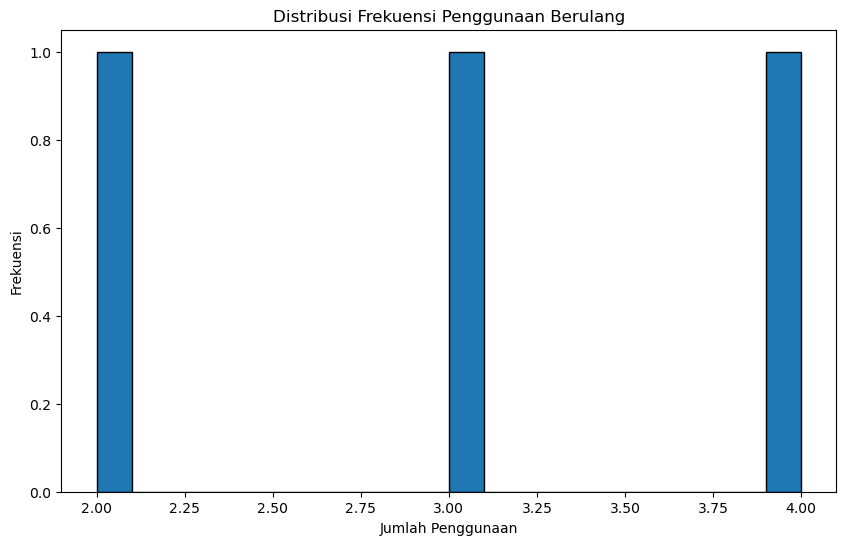

In [41]:
# Function to extract repeated usage experiences
def extract_repeated_usage(text):
    experiences = re.findall(r'(?:sudah|telah) (\d+) kali (?:pakai|gunakan|konsultasi)', text, re.IGNORECASE)
    return experiences if experiences else None

# Apply the function to the 'content' column
df['repeated_usage'] = df['content'].apply(extract_repeated_usage)

# Filter rows where repeated_usage is not None
reviews_with_repeated_usage = df[df['repeated_usage'].notna()]

# Display the results
print(f"Jumlah review yang menyebutkan penggunaan berulang: {len(reviews_with_repeated_usage)}")
for index, row in reviews_with_repeated_usage.iterrows():
    print(f"\nContent: {row['content']}")
    print(f"Penggunaan berulang: {', '.join(row['repeated_usage'])} kali")

# Optional: Analyze frequency of repeated usage
all_usage_counts = [int(count) for counts in reviews_with_repeated_usage['repeated_usage'] for count in counts]
usage_counts = pd.Series(all_usage_counts)

print("\nStatistik penggunaan berulang:")
print(usage_counts.describe())

# Optional: Visualize the distribution of repeated usage
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(usage_counts, bins=20, edgecolor='black')
plt.title("Distribusi Frekuensi Penggunaan Berulang")
plt.xlabel("Jumlah Penggunaan")
plt.ylabel("Frekuensi")
plt.show()

## Regex for Exracting Grievance with the Doctor Service

Jumlah review yang menyebutkan keluhan tentang dokter: 5

Content: Saya sudah 3 kali pakai layanan ini dan dokter tidak ramah.
Keluhan tentang dokter: ramah

Content: Telah 2 kali konsultasi, dokter kurang informatif.
Keluhan tentang dokter: informatif

Content: Sudah 5 kali gunakan layanan ini, dokter tidak profesional.
Keluhan tentang dokter: profesional

Content: Dokter tidak tersedia saat saya butuh.
Keluhan tentang dokter: tersedia saat saya butuh

Content: Dokter kurang responsif terhadap pertanyaan saya.
Keluhan tentang dokter: responsif terhadap pertanyaan saya

Keluhan yang paling sering disebutkan:
ramah                                 1
informatif                            1
profesional                           1
tersedia saat saya butuh              1
responsif terhadap pertanyaan saya    1
Name: count, dtype: int64


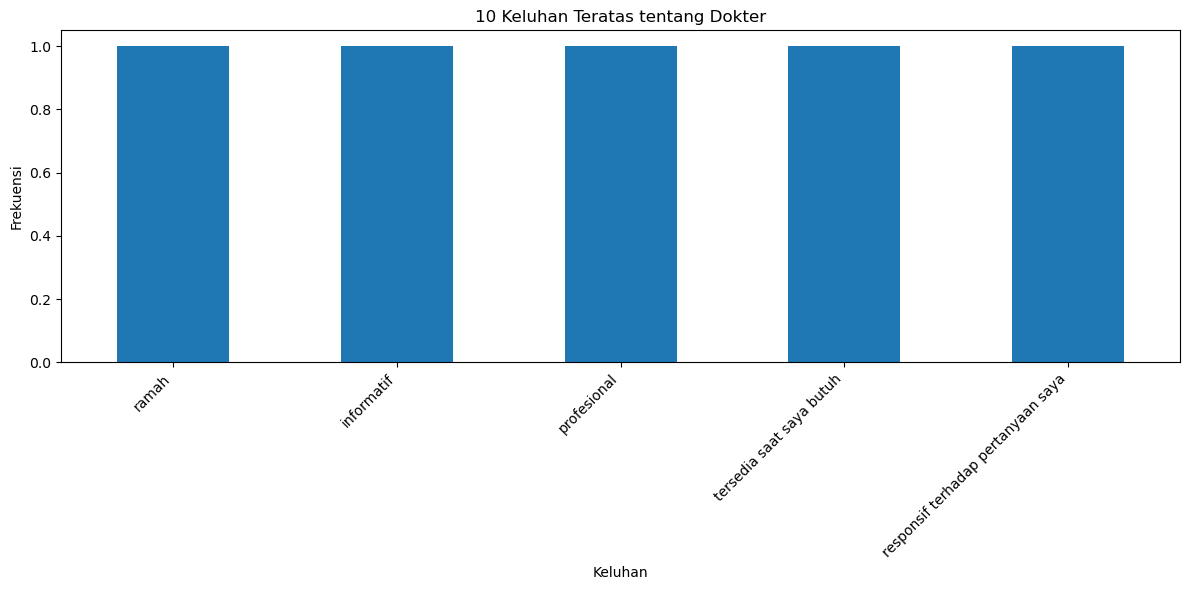

In [49]:
# Function to extract complaints about doctors
def extract_doctor_complaints(text):
    complaints = re.findall(r'dokter (?:tidak|kurang) ([\w\s]+)', text, re.IGNORECASE)
    return complaints if complaints else None

# Apply the function to the 'content' column
df['doctor_complaints'] = df['content'].apply(extract_doctor_complaints)

# Filter rows where doctor_complaints is not None
reviews_with_complaints = df[df['doctor_complaints'].notna()]

# Display the results
print(f"Jumlah review yang menyebutkan keluhan tentang dokter: {len(reviews_with_complaints)}")
for index, row in reviews_with_complaints.iterrows():
    print(f"\nContent: {row['content']}")
    print(f"Keluhan tentang dokter: {', '.join(row['doctor_complaints'])}")

# Optional: Analyze frequency of complaints
all_complaints = [complaint for complaints in reviews_with_complaints['doctor_complaints'] for complaint in complaints]
complaint_counts = pd.Series(all_complaints).value_counts()

print("\nKeluhan yang paling sering disebutkan:")
print(complaint_counts.head())

# Optional: Visualize the top complaints
plt.figure(figsize=(12, 6))
complaint_counts.head(10).plot(kind='bar')
plt.title("10 Keluhan Teratas tentang Dokter")
plt.xlabel("Keluhan")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Regex for Exracting Comments about Service Bills

Jumlah review yang menyebutkan komentar harga: 0

Komentar harga yang paling sering disebutkan:
Series([], Name: count, dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

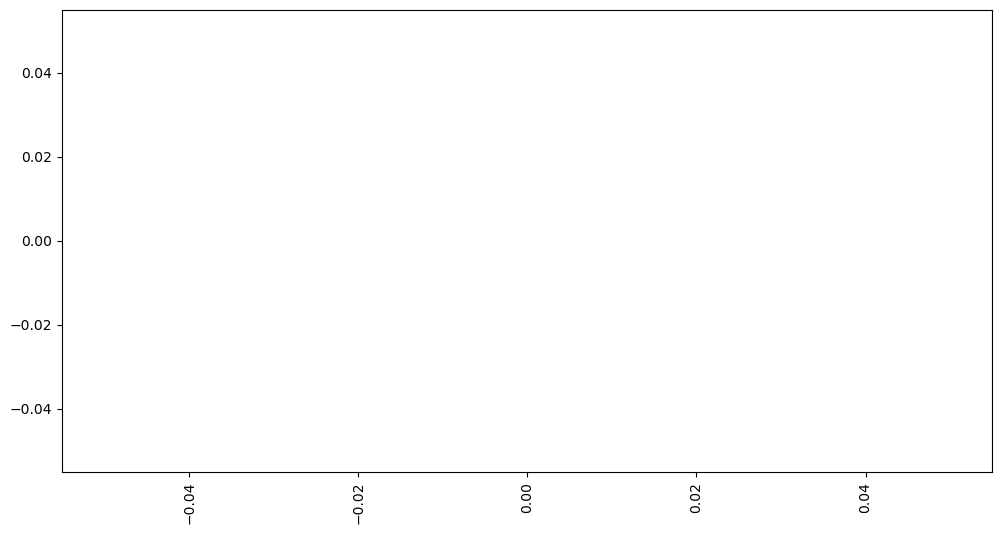

In [50]:
# Function to extract price comments
def extract_price_comments(text):
    comments = re.findall(r'(?:harga|biaya) (?:obat|konsultasi) ([\w\s]+(?:mahal|murah|terjangkau)[\w\s]+)', text, re.IGNORECASE)
    return comments if comments else None

# Apply the function to the 'content' column
df['price_comments'] = df['content'].apply(extract_price_comments)

# Filter rows where price_comments is not None
reviews_with_price_comments = df[df['price_comments'].notna()]

# Display the results
print(f"Jumlah review yang menyebutkan komentar harga: {len(reviews_with_price_comments)}")
for index, row in reviews_with_price_comments.iterrows():
    print(f"\nContent: {row['content']}")
    print(f"Komentar harga: {', '.join(row['price_comments'])}")

# Optional: Analyze frequency of price comments
all_comments = [comment for comments in reviews_with_price_comments['price_comments'] for comment in comments]
comment_counts = pd.Series(all_comments).value_counts()

print("\nKomentar harga yang paling sering disebutkan:")
print(comment_counts.head())

# Optional: Visualize the top price comments
plt.figure(figsize=(12, 6))
comment_counts.head(10).plot(kind='bar')
plt.title("10 Komentar Harga Teratas")
plt.xlabel("Komentar")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()